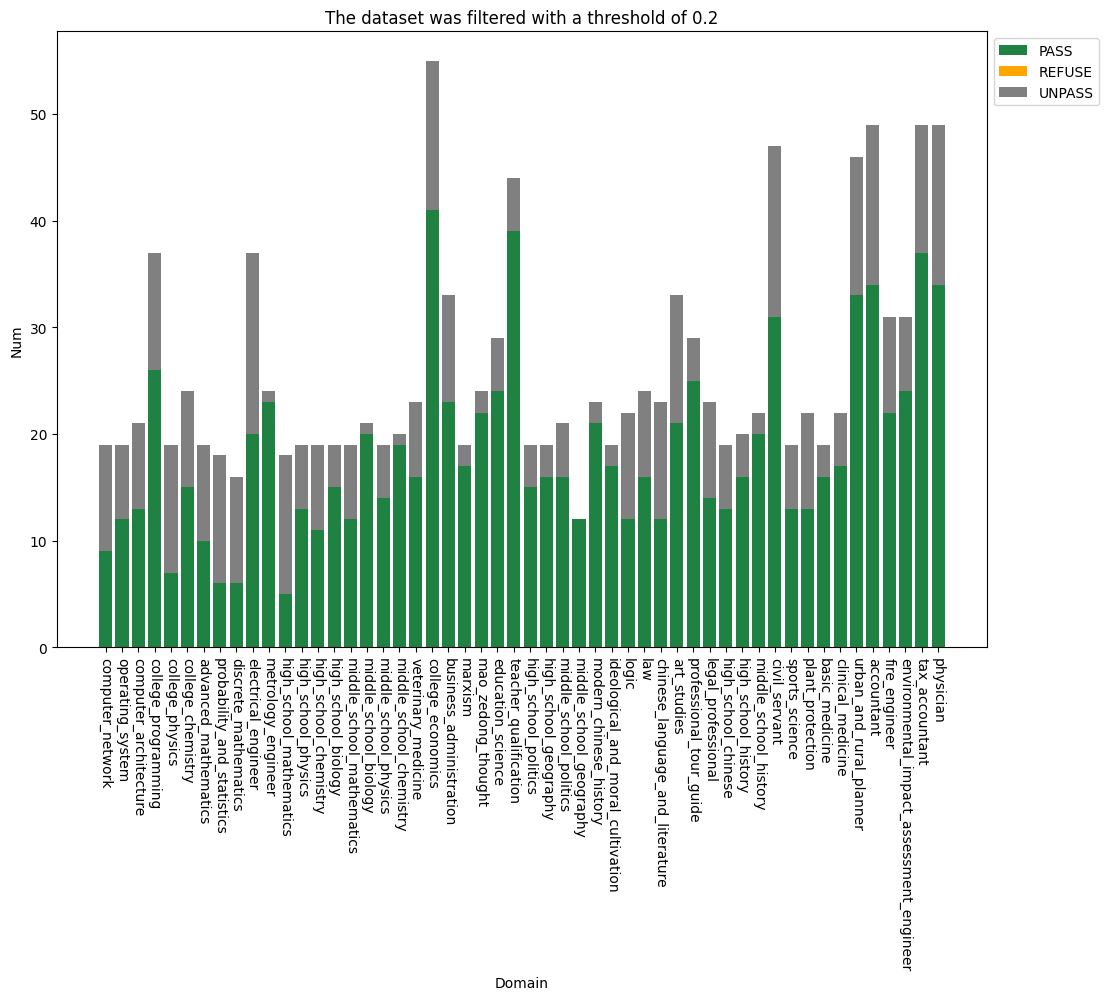

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import json

# PATH_Origin = "data/Qwen2-1.5B-Instruct_CEval/evalution_res/Qwen2_1.5B-Instruct-LFfinefune/Qwen2_1.5B-Instruct-LFfinefune.json"
# PATH_Origin = "data/Qwen2-1.5B-Instruct_CEval/evalution_res/Qwen2_1.5B-Instruct-LFfinefune_05/Qwen2_1.5B-Instruct-LFfinefune_05.json"
PATH_Origin = "data/Qwen2-1.5B-Instruct_CEval/evalution_res/Qwen2_1.5B-Instruct-LFfinefune_02/Qwen2_1.5B-Instruct-LFfinefune_02.json"

# 读取json数据集
with open(PATH_Origin, 'r', encoding='utf-8') as file:
    data_origin = json.load(file)

# 获取字典的所有键
keys = list(data_origin.keys())
# 删除最后一个键值对
if keys:
    last_key = keys[-1]
    del data_origin[last_key]

# 提取数据
keys = list(data_origin.keys())
values = [list(data_origin[key].values()) for key in keys]
values = [[v[0], v[2] , v[1]] for v in values]
value_labels = list(data_origin[keys[0]].keys())[:3]  # 不显示ACC比例
value_labels = [value_labels[0], value_labels[2], value_labels[1]]

# 设置柱状图的位置
x = np.arange(len(keys))
width = 0.8   # 柱子的宽度，根据类别数量调整

# 创建图形
fig, ax = plt.subplots(figsize=(12, 8))

colors = ['#1f8142', '#FFA500', 'grey']
# 绘制每个 value 的堆叠柱状图
bottom = np.zeros(len(keys))
for i, label in enumerate(value_labels):
    ax.bar(x, [v[i] for v in values], width, label=label, bottom=bottom,color = colors[i])
    bottom += [v[i] for v in values]

# 添加标签和标题
ax.set_xlabel('Domain')
ax.set_ylabel('Num')
ax.set_title('The dataset was filtered with a threshold of 0.2')
# ax.set_title('First finetuned Model')
# ax.set_title('Origin Model')

ax.set_xticks(x)  # 设置横坐标刻度位置

ax.set_xticklabels(keys, rotation=270)  # 设置横坐标文字竖着显示
ax.legend()
# 将图例放在图表右侧
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
# 显示图形
plt.show()


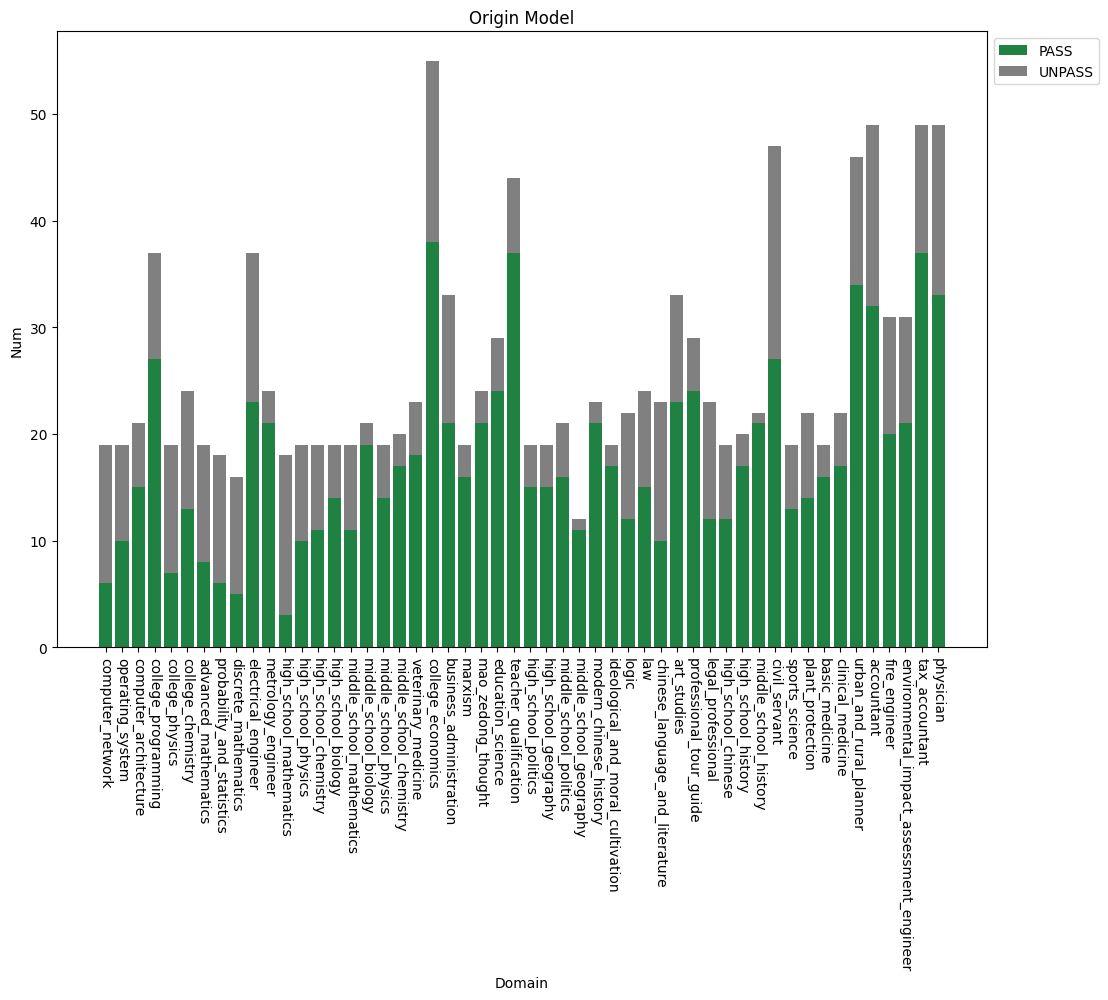

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import json

PATH_Origin = 'data/Qwen2-1.5B-Instruct_CEval/evalution_res/Qwen2-1.5B-Instruct/Qwen2-1.5B-Instruct.json'

# 读取json数据集
with open(PATH_Origin, 'r', encoding='utf-8') as file:
    data_origin = json.load(file)

# 获取字典的所有键
keys = list(data_origin.keys())
# 删除最后一个键值对
if keys:
    last_key = keys[-1]
    del data_origin[last_key]

# 提取数据
keys = list(data_origin.keys())
values = [list(data_origin[key].values()) for key in keys]
# 修改 values，将每个子列表的第二个值减去第一个值
values = [[v[0], v[1] - v[0]] for v in values]

value_labels = list(data_origin[keys[0]].keys())[:2]  # 不显示ACC比例
value_labels[1] = "UNPASS"
# 设置柱状图的位置
x = np.arange(len(keys))
width = 0.8   # 柱子的宽度，根据类别数量调整

# 创建图形
fig, ax = plt.subplots(figsize=(12, 8))
# 定义颜色列表
colors = ['#1f8142', 'grey']
# 绘制每个 value 的堆叠柱状图
bottom = np.zeros(len(keys))
for i, label in enumerate(value_labels):
    ax.bar(x, [v[i] for v in values], width, label=label, bottom=bottom,color = colors[i])
    bottom += [v[i] for v in values]

# 添加标签和标题
ax.set_xlabel('Domain')
ax.set_ylabel('Num')
ax.set_title('Origin Model')

ax.set_xticks(x)  # 设置横坐标刻度位置

ax.set_xticklabels(keys, rotation=270)  # 设置横坐标文字竖着显示
ax.legend()
# 将图例放在图表右侧
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
# 显示图形
plt.show()

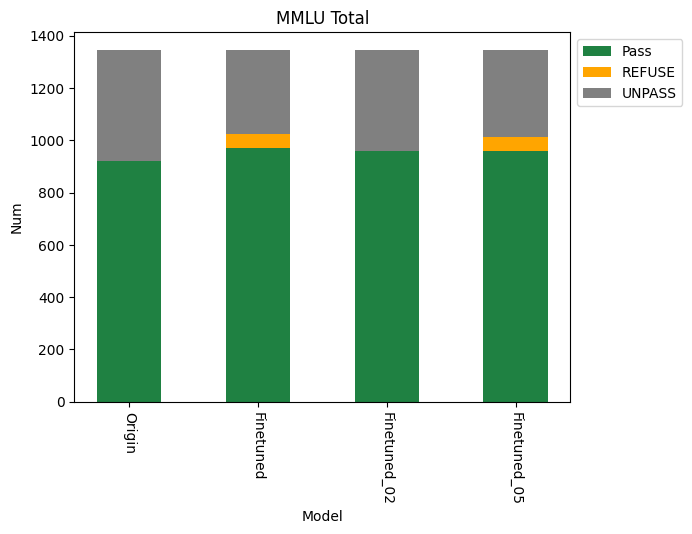

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import json

PATH_Origin = 'data/Qwen2-1.5B-Instruct_CEval/evalution_res/Qwen2-1.5B-Instruct/Qwen2-1.5B-Instruct.json'
PATH_FT = "data/Qwen2-1.5B-Instruct_CEval/evalution_res/Qwen2_1.5B-Instruct-LFfinefune/Qwen2_1.5B-Instruct-LFfinefune.json"
PATH_FT_02 = "data/Qwen2-1.5B-Instruct_CEval/evalution_res/Qwen2_1.5B-Instruct-LFfinefune_02/Qwen2_1.5B-Instruct-LFfinefune_02.json"
PATH_FT_05 = "data/Qwen2-1.5B-Instruct_CEval/evalution_res/Qwen2_1.5B-Instruct-LFfinefune_05/Qwen2_1.5B-Instruct-LFfinefune_05.json"

# 读取json数据集
with open(PATH_Origin, 'r') as file:
    data_origin = json.load(file)

with open(PATH_FT, 'r') as file:
    data_FT = json.load(file)

with open(PATH_FT_02, 'r') as file:
    data_FT02 = json.load(file)

with open(PATH_FT_05, 'r') as file:
    data_FT05 = json.load(file)

# 获取字典的所有键
data = {"Origin":{}}
keys = list(data_origin.keys())
"""
        "PASS": 73,
        "TOTAL": 99,
        "ACC": 0.7374
"""
# 只保留最后一个键值对
if keys:
    last_key = keys[-1]
    data["Origin"]["Pass"] = data_origin[last_key]["Pass"]
    data["Origin"]['UNPASS'] = data_origin[last_key]['Total'] - data_origin[last_key]['Pass']
    data["Origin"]['REFUSE'] = 0
    data["Origin"]['Total'] = data_origin[last_key]['Total']
    data["Origin"]["Accuarcy"] = data_origin[last_key]["Accuarcy"]

keys = list(data_FT.keys())
"""
    "PASS": 36,
    "UNPASS": 38,
    "REFUSE": 2,
    "TOTAL": 76,
    "ACC": 0.4737
"""
if keys:
    last_key = keys[-1]
    data["Finetuned"]=data_FT[last_key]

keys = list(data_FT02.keys())
if keys:
    last_key = keys[-1]
    data["Finetuned_02"]= data_FT02[last_key]

keys = list(data_FT05.keys())
if keys:
    last_key = keys[-1]
    data["Finetuned_05"]= data_FT05[last_key]


# 提取数据
keys = list(data.keys())
values = [list(data[key].values()) for key in keys]
# 修改 values，将每个子列表的第二个值减去第一个值
values = [[v[0], v[2] , v[1]] for v in values]
value_labels = list(data[keys[0]].keys())
value_labels = [value_labels[0],value_labels[2],value_labels[1]]
# 设置柱状图的位置
x = np.arange(len(keys))
width = 0.5   # 柱子的宽度，根据类别数量调整

# 创建图形
fig, ax = plt.subplots()

# 定义颜色列表
colors = ['#1f8142', '#FFA500', 'grey']

# 绘制每个 value 的堆叠柱状图
bottom = np.zeros(len(keys))
for i, label in enumerate(value_labels):
    ax.bar(x, [v[i] for v in values], width, label=label, bottom=bottom, color=colors[i])
    bottom += [v[i] for v in values]

# 添加标签和标题
ax.set_xlabel('Model')
ax.set_ylabel('Num')
ax.set_title('MMLU Total')

ax.set_xticks(x)  # 设置横坐标刻度位置

ax.set_xticklabels(keys, rotation=270)  # 设置横坐标文字竖着显示
ax.legend()
# 将图例放在图表右侧
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
# 显示图形
plt.show()